In [ ]:
!pip install torch torchvision matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 23.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


# Mnist

Using device: cuda
Epoch 1/10
Train Loss: 0.2264, Test Loss: 0.1101, Accuracy: 0.9665
Epoch 2/10
Train Loss: 0.0872, Test Loss: 0.0825, Accuracy: 0.9737
Epoch 3/10
Train Loss: 0.0574, Test Loss: 0.0801, Accuracy: 0.9763
Epoch 4/10
Train Loss: 0.0379, Test Loss: 0.0632, Accuracy: 0.9812
Epoch 5/10
Train Loss: 0.0259, Test Loss: 0.0713, Accuracy: 0.9788
Epoch 6/10
Train Loss: 0.0184, Test Loss: 0.0778, Accuracy: 0.9777
Epoch 7/10
Train Loss: 0.0120, Test Loss: 0.0742, Accuracy: 0.9802
Epoch 8/10
Train Loss: 0.0100, Test Loss: 0.0746, Accuracy: 0.9808
Epoch 9/10
Train Loss: 0.0058, Test Loss: 0.0743, Accuracy: 0.9834
Epoch 10/10
Train Loss: 0.0034, Test Loss: 0.0797, Accuracy: 0.9816
Epoch 1/10
Train Loss: 0.1099, Test Loss: 0.1134, Accuracy: 0.9679
Epoch 2/10
Train Loss: 0.0511, Test Loss: 0.1336, Accuracy: 0.9656
Epoch 3/10
Train Loss: 0.0409, Test Loss: 0.0844, Accuracy: 0.9800
Epoch 4/10
Train Loss: 0.0245, Test Loss: 0.0974, Accuracy: 0.9783
Epoch 5/10
Train Loss: 0.0172, Test Loss: 

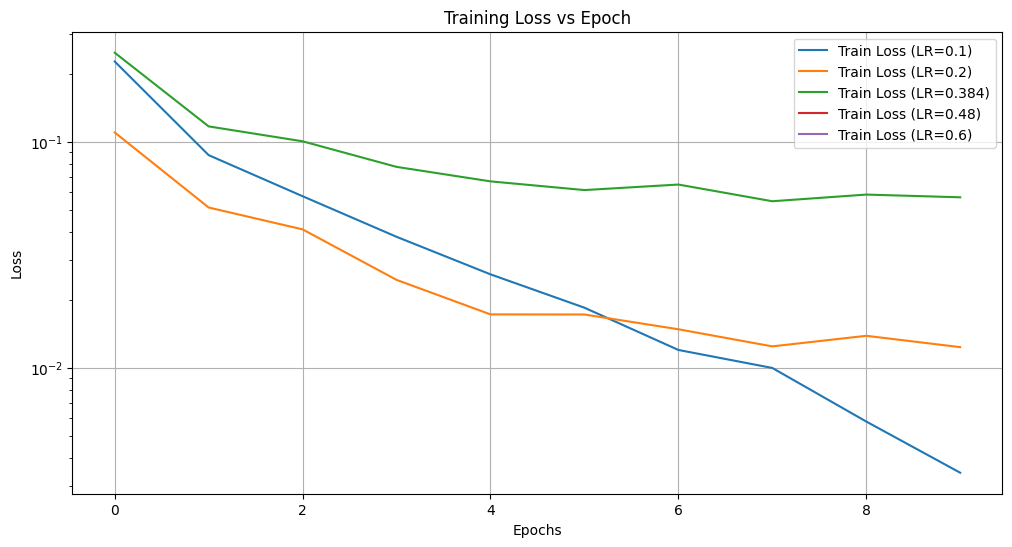

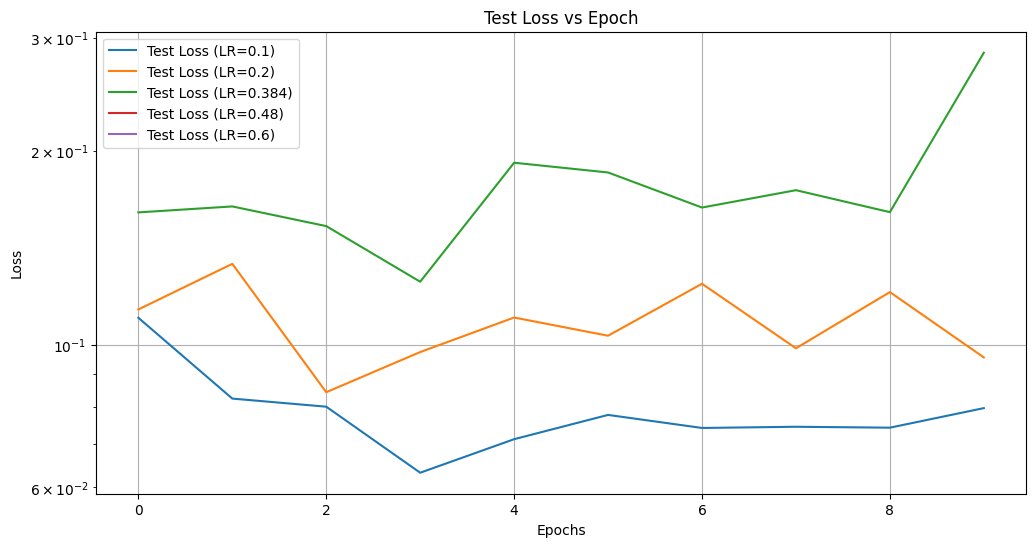

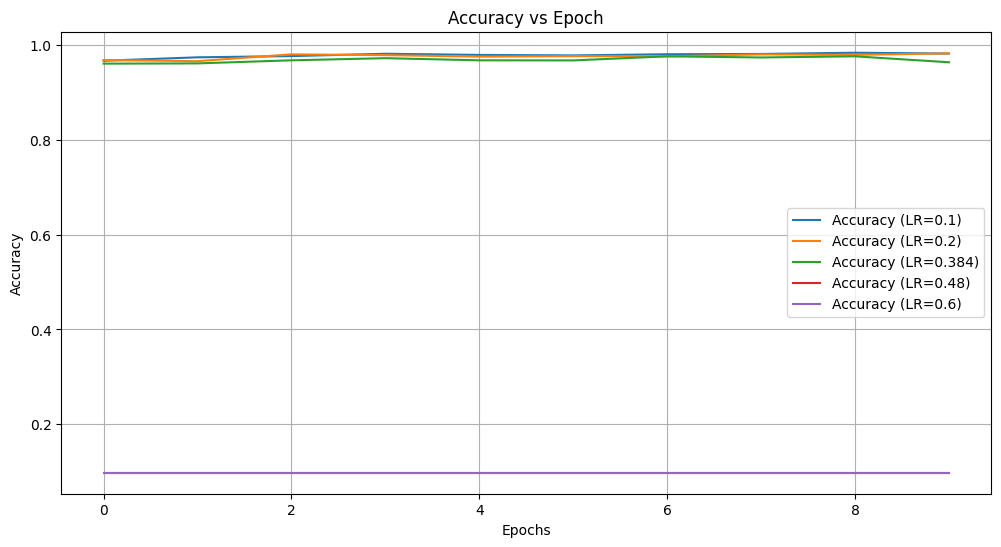

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Transform to convert images to tensor and normalize them
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])  # Adjusted normalization for MNIST

# Download MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Reduce batch size to 32 for faster execution
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=4)  # Reduced batch size to 32
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=4)  # Reduced batch size to 32

# Define the Neural Network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)  # Increased neurons
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)  # Output size: 10

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Function to train the model
def train_model(model, trainloader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    for data in trainloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
        optimizer.zero_grad()

        # Standard forward pass and loss computation
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()  # Backpropagate gradients
        optimizer.step()  # Update the weights

        # Clip gradients to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Clip gradients to max norm of 1

        running_loss += loss.item()
    return running_loss / len(trainloader)

# Function to test the model
def test_model(model, testloader, criterion):
    model.eval()
    correct = 0
    total = 0
    test_loss = 0.0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return test_loss / len(testloader), accuracy

# Initialize lists for tracking loss and accuracy for different learning rates
learning_rates = [0.1,0.2,0.384,0.48,0.6]  # Reduced learning rates
train_losses = {lr: [] for lr in learning_rates}
test_losses = {lr: [] for lr in learning_rates}
accuracies = {lr: [] for lr in learning_rates}

# Check if CUDA is available and use GPU if possible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialize the model, loss function, and criterion
model = SimpleNN().to(device)  # Move model to GPU
criterion = nn.CrossEntropyLoss()

# Train and test the model with different learning rates
for lr in learning_rates:
    optimizer = optim.SGD(model.parameters(), lr=lr)

    # Learning rate scheduler: Decay by 10%, 20%, or other desired value at intervals
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda epoch: 0.9 if epoch > 2 else 1)  # Decay by 10% after epoch 2

    train_loss = []
    test_loss = []
    accuracy = []

    for epoch in range(10):  # Training for 100 epochs
        print(f"Epoch {epoch+1}/10")
        train_epoch_loss = train_model(model, trainloader, criterion, optimizer)
        test_epoch_loss, acc = test_model(model, testloader, criterion)

        print(f"Train Loss: {train_epoch_loss:.4f}, Test Loss: {test_epoch_loss:.4f}, Accuracy: {acc:.4f}")

        train_loss.append(train_epoch_loss)
        test_loss.append(test_epoch_loss)
        accuracy.append(acc)

        # Step the scheduler to adjust the learning rate
        scheduler.step()

    train_losses[lr] = train_loss
    test_losses[lr] = test_loss
    accuracies[lr] = accuracy

# Plot Training Losses
plt.figure(figsize=(12, 6))
for lr in learning_rates:
    plt.plot(train_losses[lr], label=f'Train Loss (LR={lr})')
plt.title('Training Loss vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Log scale for better visualization of large ranges
plt.show()

# Plot Test Losses
plt.figure(figsize=(12, 6))
for lr in learning_rates:
    plt.plot(test_losses[lr], label=f'Test Loss (LR={lr})')
plt.title('Test Loss vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Log scale for better visualization of large ranges
plt.show()

# Plot Accuracy
plt.figure(figsize=(12, 6))
for lr in learning_rates:
    plt.plot(accuracies[lr], label=f'Accuracy (LR={lr})')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# MNIST-PLOTS

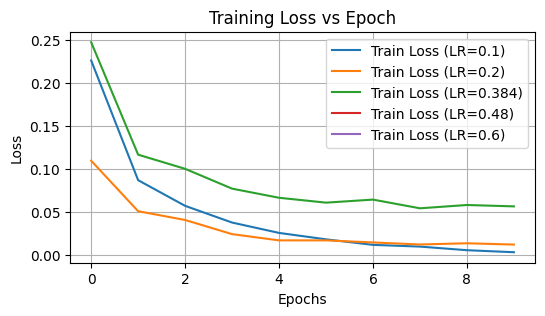

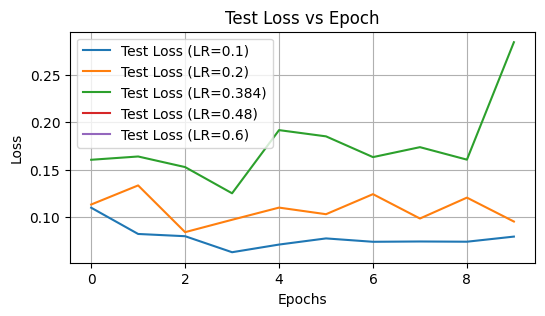

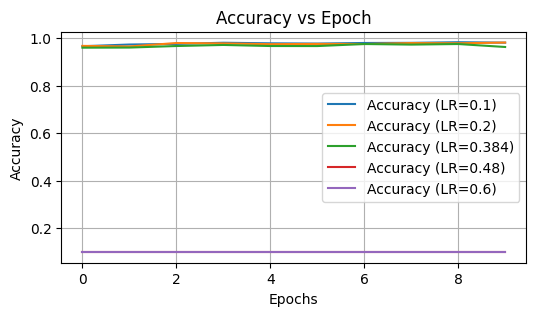

In [ ]:
# Plot Training Loss vs Epoch (Without Log Scale)
plt.figure(figsize=(6,3))
for lr in learning_rates:
    plt.plot(train_losses[lr], label=f'Train Loss (LR={lr})')
plt.title('Training Loss vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Test Loss vs Epoch (Without Log Scale)
plt.figure(figsize=(6,3))
for lr in learning_rates:
    plt.plot(test_losses[lr], label=f'Test Loss (LR={lr})')
plt.title('Test Loss vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy vs Epoch (Without Log Scale)
plt.figure(figsize=(6,3))
for lr in learning_rates:
    plt.plot(accuracies[lr], label=f'Accuracy (LR={lr})')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Mnist-Fashion

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 201kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.77MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.3MB/s]
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Using device: cuda
Epoch 1/10
Train Loss: 0.5342, Test Loss: 0.4393, Accuracy: 0.8402
Epoch 2/10
Train Loss: 0.3838, Test Loss: 0.5118, Accuracy: 0.8207
Epoch 3/10
Train Loss: 0.3424, Test Loss: 0.3954, Accuracy: 0.8555
Epoch 4/10
Train Loss: 0.3116, Test Loss: 0.3494, Accuracy: 0.8702
Epoch 5/10
Train Loss: 0.2920, Test Loss: 0.3651, Accuracy: 0.8671
Epoch 6/10
Train Loss: 0.2777, Test Loss: 0.3593, Accuracy: 0.8649
Epoch 7/10
Train Loss: 0.2624, Test Loss: 0.3472, Accuracy: 0.8756
Epoch 8/10
Train Loss: 0.2511, Test Loss: 0.3943, Accuracy: 0.8675
Epoch 9/10
Train Loss: 0.2423, Test Loss: 0.3310, Accuracy: 0.8813
Epoch 10/10
Train Loss: 0.2292, Test Loss: 0.3368, Accuracy: 0.8841
Epoch 1/10
Train Loss: 0.3229, Test Loss: 0.3650, Accuracy: 0.8676
Epoch 2/10
Train Loss: 0.2850, Test Loss: 0.3503, Accuracy: 0.8773
Epoch 3/10
Train Loss: 0.2721, Test Loss: 0.3543, Accuracy: 0.8776
Epoch 4/10
Train Loss: 0.2454, Test Loss: 0.3709, Accuracy: 0.8712
Epoch 5/10
Train Loss: 0.2333, Test Loss: 

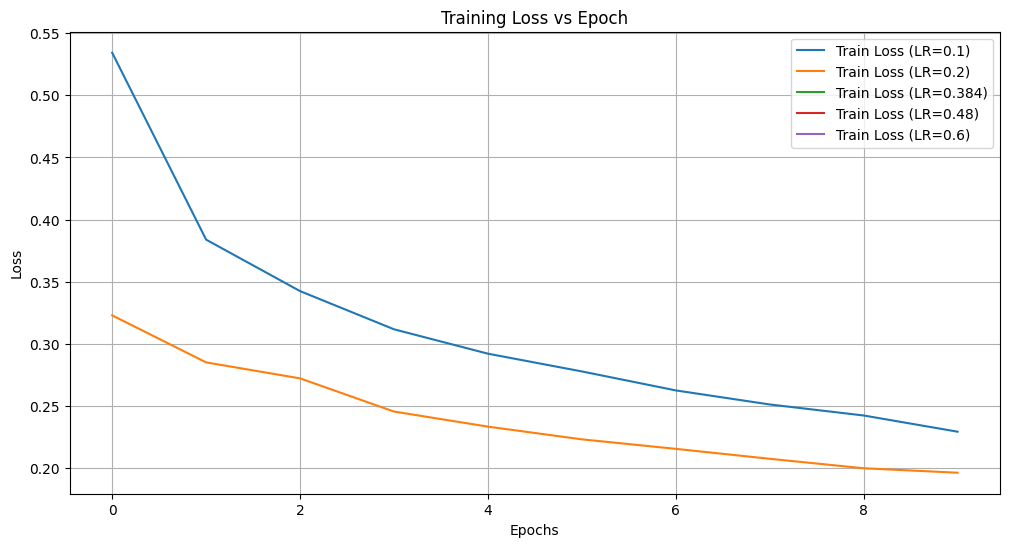

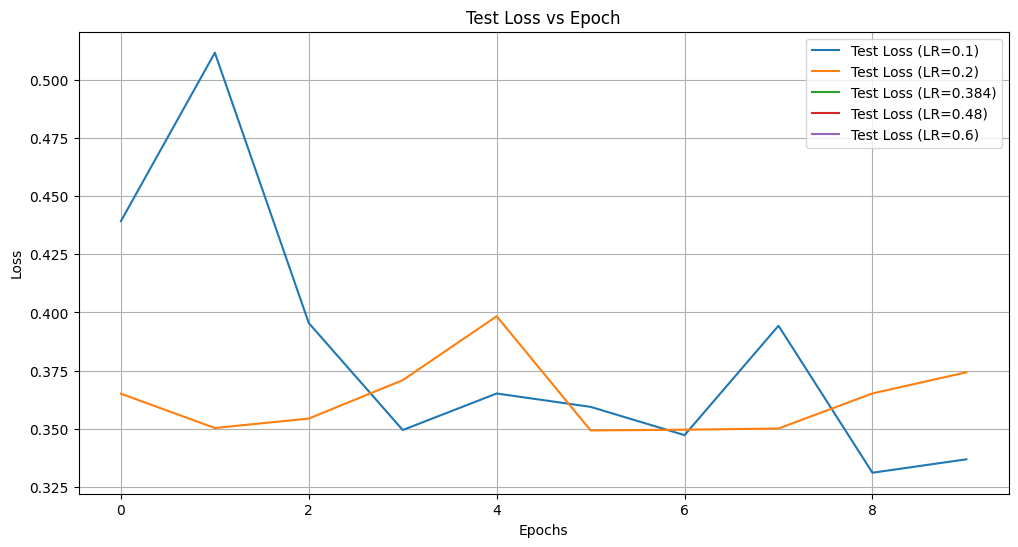

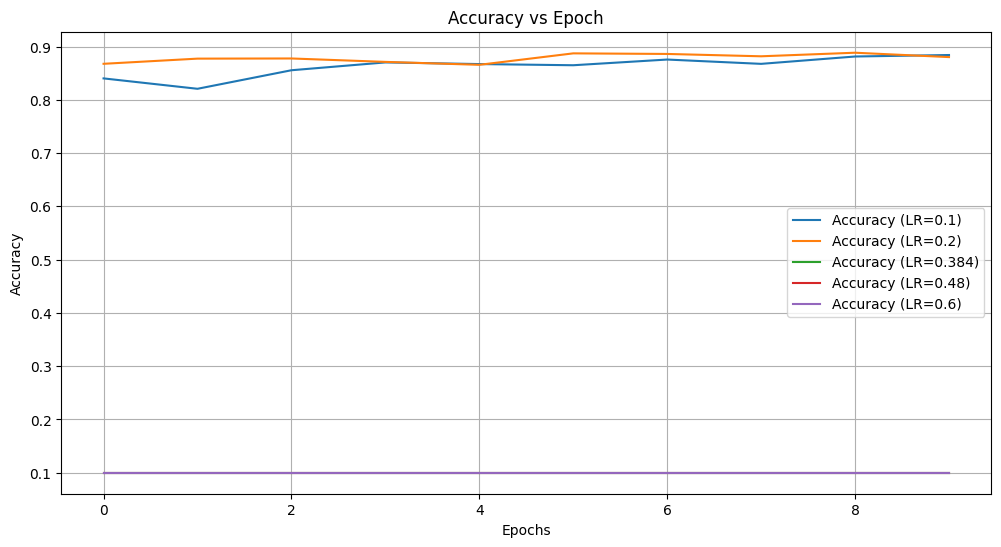

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Transform to convert images to tensor and normalize them
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])  # Adjusted normalization for Fashion-MNIST

# Download Fashion-MNIST dataset
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=4)  # Reduced batch size to 32
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=4)  # Reduced batch size to 32

# Define the Neural Network model for Fashion-MNIST (28x28 grayscale images)
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)  # Increased neurons for Fashion-MNIST
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)  # Output size: 10 (for Fashion-MNIST classes)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Function to train the model
def train_model(model, trainloader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    for data in trainloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
        optimizer.zero_grad()

        # Standard forward pass and loss computation
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()  # Backpropagate gradients
        optimizer.step()  # Update the weights

        running_loss += loss.item()
    return running_loss / len(trainloader)

# Function to test the model
def test_model(model, testloader, criterion):
    model.eval()
    correct = 0
    total = 0
    test_loss = 0.0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return test_loss / len(testloader), accuracy

# Initialize lists for tracking loss and accuracy for different learning rates
learning_rates = [0.1, 0.2,0.384,0.48, 0.6]
train_losses = {lr: [] for lr in learning_rates}
test_losses = {lr: [] for lr in learning_rates}
accuracies = {lr: [] for lr in learning_rates}

# Check if CUDA is available and use GPU if possible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialize the model, loss function, and criterion
model = SimpleNN().to(device)  # Move model to GPU
criterion = nn.CrossEntropyLoss()

# Train and test the model with different learning rates
for lr in learning_rates:
    optimizer = optim.SGD(model.parameters(), lr=lr)

    # Learning rate scheduler: Decay by 10%, 20%, or other desired value at intervals
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda epoch: 0.9 if epoch > 2 else 1)

    train_loss = []
    test_loss = []
    accuracy = []

    for epoch in range(10):  # Training for 100 epochs
        print(f"Epoch {epoch+1}/10")
        train_epoch_loss = train_model(model, trainloader, criterion, optimizer)
        test_epoch_loss, acc = test_model(model, testloader, criterion)

        print(f"Train Loss: {train_epoch_loss:.4f}, Test Loss: {test_epoch_loss:.4f}, Accuracy: {acc:.4f}")

        train_loss.append(train_epoch_loss)
        test_loss.append(test_epoch_loss)
        accuracy.append(acc)

        # Step the scheduler to adjust the learning rate
        scheduler.step()

    train_losses[lr] = train_loss
    test_losses[lr] = test_loss
    accuracies[lr] = accuracy

# Plot Training Loss vs Epoch
plt.figure(figsize=(12, 6))
for lr in learning_rates:
    plt.plot(train_losses[lr], label=f'Train Loss (LR={lr})')
plt.title('Training Loss vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Test Loss vs Epoch
plt.figure(figsize=(12, 6))
for lr in learning_rates:
    plt.plot(test_losses[lr], label=f'Test Loss (LR={lr})')
plt.title('Test Loss vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy vs Epoch
plt.figure(figsize=(12, 6))
for lr in learning_rates:
    plt.plot(accuracies[lr], label=f'Accuracy (LR={lr})')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Mnist-Fashion Plots

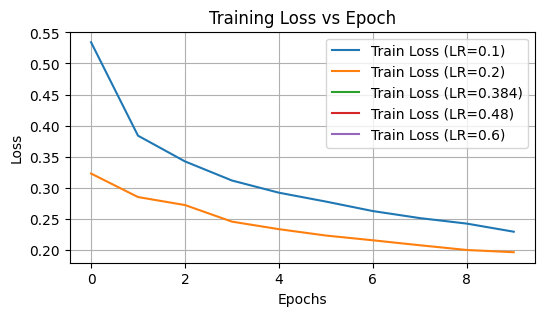

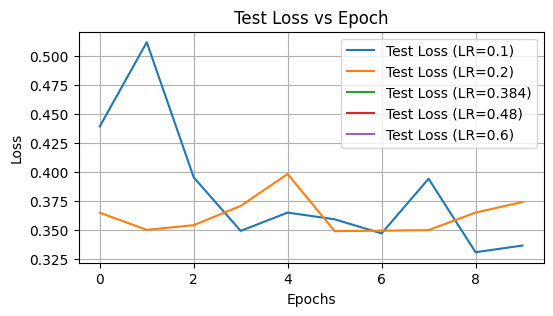

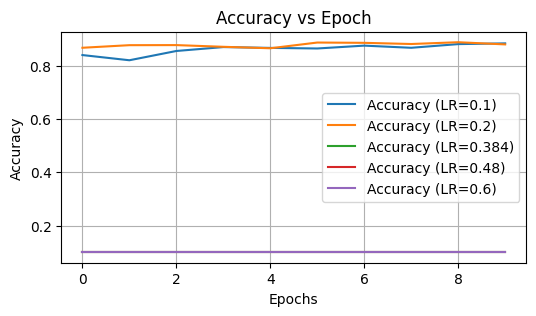

In [ ]:

# Plot Training Loss vs Epoch
plt.figure(figsize=(6,3))
for lr in learning_rates:
    plt.plot(train_losses[lr], label=f'Train Loss (LR={lr})')
plt.title('Training Loss vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Test Loss vs Epoch
plt.figure(figsize=(6,3))
for lr in learning_rates:
    plt.plot(test_losses[lr], label=f'Test Loss (LR={lr})')
plt.title('Test Loss vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy vs Epoch
plt.figure(figsize=(6,3))
for lr in learning_rates:
    plt.plot(accuracies[lr], label=f'Accuracy (LR={lr})')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
